In [1]:
import numpy as np
import pandas as pd
import scipy as sp
from uncertainties import ufloat

from scipy.optimize import minimize

%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.colors as colors

In [142]:
import seaborn as sns
sns.set(style="ticks", palette="muted", rc={"xtick.bottom" : True, "ytick.left" : True})
plt.style.use('matplotlibrc')

matplotlib.rcParams['text.latex.preamble']=[r"\usepackage{amsmath}"]
matplotlib.rcParams['axes.linewidth'] = 2
matplotlib.rcParams['ytick.major.width'] = 2
matplotlib.rcParams['ytick.minor.width'] = 2
matplotlib.rcParams['xtick.major.width'] = 2
matplotlib.rcParams['xtick.minor.width'] = 2
matplotlib.rcParams['ytick.minor.visible'] = True
matplotlib.rcParams['xtick.minor.visible'] = True

In [149]:
import warnings
warnings.simplefilter("ignore", UserWarning)

In [29]:
DF = pd.read_table("cc.dat", sep="\\s+")
DF

,M,e_M,Y,e_Y,Z,e_Z,age,e_age,X_c,e_X_c,CCB_mass,e_CCB_mass,CCB_radius,e_CCB_radius,FM_mass,e_FM_mass,FM_radius,e_FM_radius
0,1.170160,0.042170,0.267701,0.013064,0.029291,0.002844,3.586024,0.773991,0.320967,0.089924,0.013701,0.007542,0.033624,0.013640,0.021183,0.014885,0.037694,0.016866
1,1.185207,0.062554,0.276396,0.011422,0.015727,0.003690,5.100437,0.561424,0.000392,0.000582,0.001980,0.002935,0.002398,0.003556,0.002402,0.003561,0.002586,0.003834
2,1.431056,0.077762,0.271782,0.006392,0.021674,0.004747,1.372323,0.580546,0.489059,0.073778,0.112884,0.012996,0.122785,0.009686,0.186892,0.025791,0.147229,0.009983
3,1.120757,0.053370,0.257613,0.003570,0.017692,0.002476,7.594268,1.027722,0.094391,0.026669,0.063540,0.005313,0.076377,0.005669,0.114455,0.005128,0.096946,0.005250
4,1.071048,0.028132,0.267115,0.008565,0.018706,0.001352,5.846281,0.488567,0.102544,0.029568,0.004731,0.002548,0.009953,0.004241,0.007226,0.004057,0.011342,0.005084
5,1.296400,0.049946,0.281879,0.010416,0.020417,0.002070,3.877282,0.448969,0.002058,0.002516,0.007454,0.007899,0.009643,0.010140,0.008126,0.008542,0.009908,0.010384
6,1.088515,0.043503,0.275621,0.005514,0.010640,0.001778,5.270804,1.097441,0.210558,0.060200,0.068754,0.006175,0.080956,0.008002,0.134695,0.015863,0.105258,0.010685
7,1.252542,0.033285,0.277675,0.008833,0.028310,0.001926,2.514499,0.274920,0.348600,0.033961,0.032154,0.012034,0.067577,0.013113,0.034648,0.013019,0.068768,0.013567
8,1.400928,0.077359,0.276468,0.014702,0.016725,0.003716,2.754137,0.294407,0.005766,0.005131,0.022760,0.016352,0.025446,0.018339,0.025089,0.017927,0.026423,0.018880
9,0.979669,0.084952,0.277387,0.014164,0.013449,0.004009,9.796360,1.821699,0.000109,0.000162,0.000324,0.000481,0.000465,0.000690,0.000483,0.000716,0.000527,0.000782


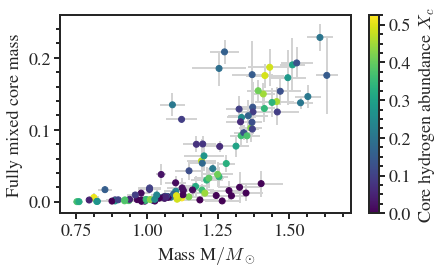

In [221]:
cmap = plt.get_cmap('viridis')
norm = colors.Normalize(vmin=min(X_cs), vmax=max(X_cs))
sm = plt.cm.ScalarMappable(norm=norm, cmap=cmap)
sm.set_array([])

plt.errorbar(DF['M'], DF['FM_mass'], xerr=DF['e_M'], yerr=DF['e_FM_mass'], 
             fmt='.', ecolor='lightgray', ms=0, zorder=0)#c=sm.to_rgba(DF['X_c'].values))
plt.scatter(DF['M'], DF['FM_mass'], c=DF['X_c'], cmap=cmap, norm=norm, zorder=1)

plt.colorbar(sm, label='Core hydrogen abundance $X_c$')
plt.xlabel('Mass M$/M_\odot$')
plt.ylabel('Fully mixed core mass')

plt.show()

In [256]:
def sigmoid(X_c, M, x=[1,1,1]): # Gompertz function 
    x0, x1, x2 = x 
    return x0 * X_c * np.exp(-10**x1 * np.exp(-x2 * M)) 

def d_sigmoid_dM(X_c, M, x=[1,1,1]): # derivative w.r.t. mass
    x0, x1, x2 = x
    return x0*x1*x2*X_c*np.exp(-10**x1*-np.exp(-x2*M)-x2*M)

def d_sigmoid_dX(X_c, M, x=[1,1,1]): # derivative w.r.t. X_c 
    x0, x1, x2 = x 
    return x0 * np.exp(-10**x1 * np.exp(-x2 * M)) 

In [229]:
new_min = DF['e_FM_mass'][DF['e_FM_mass'] > 0].min()
new_min

0.000363246814409181

In [289]:
def w_SSE(x): 
    w_SSEs = 0 
    
    if sigmoid(0.5, 0.9, x) > 0.01: # prior on low mass stars
        return np.inf
    
    for index, star in DF.iterrows(): 
        X_c       = star['X_c']
        e_X_c     = star['e_X_c']
        M         = star['M']
        e_M       = star['e_M']
        FM_mass   = star['FM_mass']
        e_FM_mass = star['e_FM_mass']
        err = (FM_mass - sigmoid(X_c, M, x))**2 
        weight = 1/(d_sigmoid_dM(X_c, M, x)**2 * 
                    e_M**2 + 
                    d_sigmoid_dX(X_c, M, x)**2 * 
                    e_X_c**2 + 
                    e_FM_mass**2) 
        #unc = e_FM_mass
        #if unc <= 0:
        #    unc = new_min
        #weight = 1/unc**2
        w_SSEs += err / weight 
    
    return w_SSEs

x0 = [0.4, 5, 10]
w_SSE(x0)

96324134158841.89

In [290]:
res = minimize(w_SSE, x0=x0, tol=1e-8)
x = res.x
x

array([0.35116681, 4.14869699, 9.10390339])

In [291]:
preds = []
for index, star in DF.iterrows():
    pred = sigmoid(star['X_c'], star['M'], x=x)
    preds += [pred]

1 - ((DF['FM_mass'] - preds)**2).sum() / ((DF['FM_mass'] - DF['FM_mass'].mean())**2).sum()

0.21720178975015814

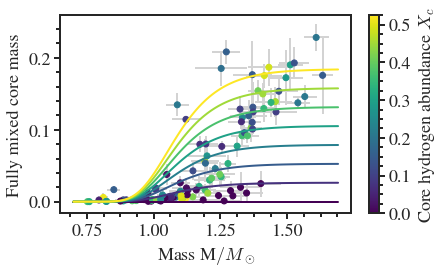

In [292]:
Ms = np.arange(0.7, 1.7, 0.01)
X_cs = np.arange(0, 0.6, 0.075)

cmap = plt.get_cmap('viridis')
norm = colors.Normalize(vmin=min(X_cs), vmax=max(X_cs))
sm = plt.cm.ScalarMappable(norm=norm, cmap=cmap)
sm.set_array([])

#x = [0.47996357, 5.25744274, 9.86616746] # [0.4, 5, 10]

for X_c in X_cs:
    plt.plot(Ms, [sigmoid(X_c, M, x=x) for M in Ms], c=sm.to_rgba(X_c), zorder=2)

plt.errorbar(DF['M'], DF['FM_mass'], xerr=DF['e_M'], yerr=DF['e_FM_mass'], 
             fmt='.', ecolor='lightgray', ms=0, zorder=0)#c=sm.to_rgba(DF['X_c'].values))
plt.scatter(DF['M'], DF['FM_mass'], c=DF['X_c'], cmap=cmap, norm=norm, zorder=1)

plt.colorbar(sm, label='Core hydrogen abundance $X_c$')
plt.xlabel('Mass M$/M_\odot$')
plt.ylabel('Fully mixed core mass')

plt.show()

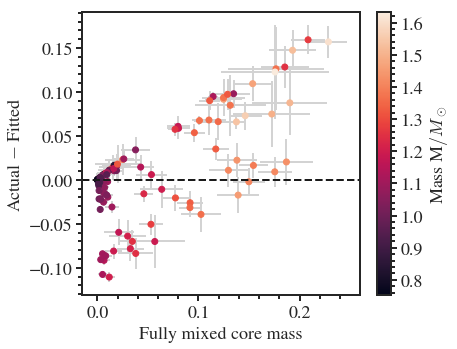

In [283]:
plt.figure(figsize=(6.64306,5.2))
preds = []
for index, star in DF.iterrows():
    pred = sigmoid(star['X_c'], star['M'], x=x)
    plt.errorbar(star['FM_mass'], (star['FM_mass'] - pred),#pred, 
                 yerr=star['e_FM_mass'], xerr=star['e_FM_mass'],
                 ecolor='lightgray', ms=2, mec='k', mfc='k', zorder=0)
    preds += [pred]

plt.scatter(DF['FM_mass'], (DF['FM_mass'] - preds), c=DF['M'], zorder=1)
plt.colorbar(label='Mass M$/M_\odot$')
plt.xlabel('Fully mixed core mass')
#plt.ylabel('Fitted value')
plt.ylabel('Actual $-$ Fitted')
#lims = [0, 0.25]
#plt.xlim(lims)
#plt.ylim(lims)
#plt.plot(lims, lims, '--k')
plt.axhline(0, linestyle='--', color='k')
plt.show()

In [14]:
from gplearn.genetic import SymbolicRegressor

In [26]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score, KFold

In [255]:
rf = RandomForestRegressor(2048)
#cross_val_score(rf, DF[['M', 'X_c']], DF['CCB_mass'], cv=KFold(n_splits=10, shuffle=True)).mean()
cross_val_score(rf, DF[['M', 'X_c']], DF['FM_mass'], cv=KFold(n_splits=10, shuffle=True)).mean()

0.6610188112974036

In [63]:
sr = SymbolicRegressor(function_set=('add', 'sub', 'mul', 'div', 'tan', 'inv'), generations=1000,
                      feature_names=['M', 'X_c'])
sr.fit(DF[['M', 'X_c']], DF['FM_mass'])

SymbolicRegressor(const_range=(-1.0, 1.0), feature_names=['M', 'X_c'],
         function_set=('add', 'sub', 'mul', 'div', 'tan', 'inv'),
         generations=1000, init_depth=(2, 6), init_method='half and half',
         low_memory=False, max_samples=1.0, metric='mean absolute error',
         n_jobs=1, p_crossover=0.9, p_hoist_mutation=0.01,
         p_point_mutation=0.01, p_point_replace=0.05,
         p_subtree_mutation=0.01, parsimony_coefficient=0.001,
         population_size=1000, random_state=None, stopping_criteria=0.0,
         tournament_size=20, verbose=0, warm_start=False)

In [64]:
print(sr._program)

mul(mul(add(M, -0.868), M), mul(add(M, -0.862), 0.287))


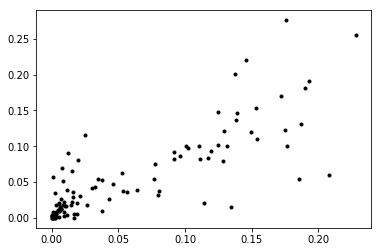

In [67]:
plt.plot(DF['FM_mass'], sr.predict(DF[['M','X_c']]), 'k.')
plt.show()